<a href="https://colab.research.google.com/github/Sugoto/Human-Activity-Recognition/blob/main/HAR_using_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HAR using various ML models**

#### Mount Google Drive if the dataset has been uploaded

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#### Loading and preprocessing data

In [ ]:
def load_file(filepath):
    return pd.read_csv(filepath, header=None, delim_whitespace=True).values

def load_dataset_group(group, prefix=''):
    X = load_file(f"{prefix}{group}/X_{group}.txt")
    y = load_file(f"{prefix}{group}/y_{group}.txt")
    return X, y

def load_dataset(prefix=''):
    train_X, train_y = load_dataset_group('train', f"{prefix}/content/drive/MyDrive/Colab Notebooks/Datasets/HAR_UCI/")
    test_X, test_y = load_dataset_group('test', f"{prefix}/content/drive/MyDrive/Colab Notebooks/Datasets/HAR_UCI/")
    
    train_y, test_y = train_y[:, 0], test_y[:, 0]
    
    return train_X, train_y, test_X, test_y


#### Defining a dictionary of models to use

In [ ]:
def define_models(models=dict()):

    models['KNN'] = KNeighborsClassifier(n_neighbors=7)
    models['CART'] = DecisionTreeClassifier()
    models['SVM'] = SVC()
    models['Naive Bayes'] = GaussianNB()

    models['Bag'] = BaggingClassifier(n_estimators=100)
    models['RandFor'] = RandomForestClassifier(n_estimators=100)
    models['ExTrees'] = ExtraTreesClassifier(n_estimators=100)
    models['GradBoost'] = GradientBoostingClassifier(n_estimators=100)
    print(f"Defined {len(models)} models: {', '.join(models.keys())}")
    return models

def evaluate_model(train_X, train_y, test_X, test_y, model):
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    accuracy = accuracy_score(test_y, y_pred)
    return {'model': model, 'accuracy': accuracy*100}

def evaluate_models(train_X, train_y, test_X, test_y, models):
    results = {}
    for name, model in models.items():
        result = evaluate_model(train_X, train_y, test_X, test_y, model)
        results[name] = result['accuracy']
        print(f"{name}: {result['accuracy']:.3f}%")
    return results

#### Running and summarizing results of the models

In [ ]:
def summarize_results(results):
    mean_scores = list(results.items())
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    mean_scores = list(reversed(mean_scores))
    print()
    print('In order of decreasing accuracy:')
    for name, score in mean_scores:
        print(f"{name} - {score:.3f}")


train_X, train_y, test_X, test_y = load_dataset()

models = define_models()

results = evaluate_models(train_X, train_y, test_X, test_y, models)

summarize_results(results)

Defined 8 models: KNN, CART, SVM, Naive Bayes, Bag, RandFor, ExTrees, GradBoost
KNN: 90.329%
CART: 86.800%
SVM: 95.046%
Naive Bayes: 77.027%
Bag: 89.888%
RandFor: 92.840%
ExTrees: 94.028%
GradBoost: 93.824%

In order of decreasing accuracy:
SVM - 95.046
ExTrees - 94.028
GradBoost - 93.824
RandFor - 92.840
KNN - 90.329
Bag - 89.888
CART - 86.800
Naive Bayes - 77.027


#### Visualize the accuracies as a Line Graph

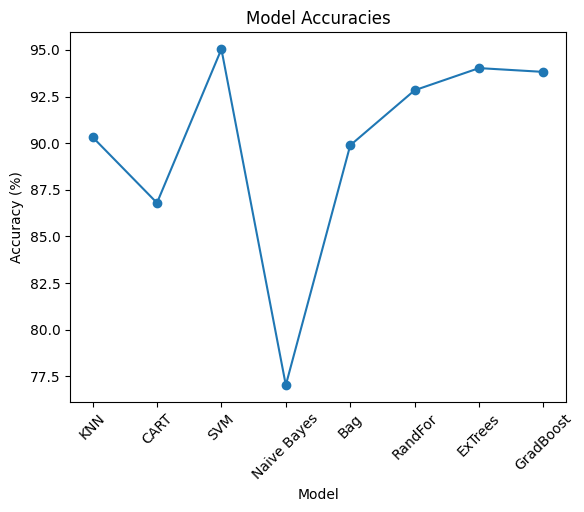

In [ ]:
model_names = list(results.keys())
accuracy_scores = list(results.values())

fig, ax = plt.subplots()
ax.plot(model_names, accuracy_scores, marker='o')

ax.set_title('Model Accuracies')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')

plt.xticks(rotation=45)
plt.show()
